In [ ]:
!pip install matplotlib

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
multitrack_metadata = pd.read_csv('/home/soumya/cambridge-mt_scrapper/data/multitrack_website/metadata.csv')
print(multitrack_metadata.head())

                                    Genre                  Artist  \
0  Acoustic / Jazz / Country / Orchestral        3D-MARCo Project   
1  Acoustic / Jazz / Country / Orchestral        3D-MARCo Project   
2  Acoustic / Jazz / Country / Orchestral        3D-MARCo Project   
3  Acoustic / Jazz / Country / Orchestral  The Abletones Big Band   
4  Acoustic / Jazz / Country / Orchestral  The Abletones Big Band   

         Track Name                               Full Multitrack Link  \
0       'A Capella'  https://zenodo.org/record/3477602/files/09%203...   
1    'Piano Solo 1'  https://zenodo.org/record/3477602/files/07%203...   
2  'String Quartet'  https://zenodo.org/record/3477602/files/04%203...   
3  'Corine, Corine'  https://mtkdata.cambridgemusictechnology.co.uk...   
4   'Song Of India'  https://mtkdata.cambridgemusictechnology.co.uk...   

  Excerpt Multitrack Link  Number of Tracks (Excerpt)  \
0                     NaN                         NaN   
1                     NaN 

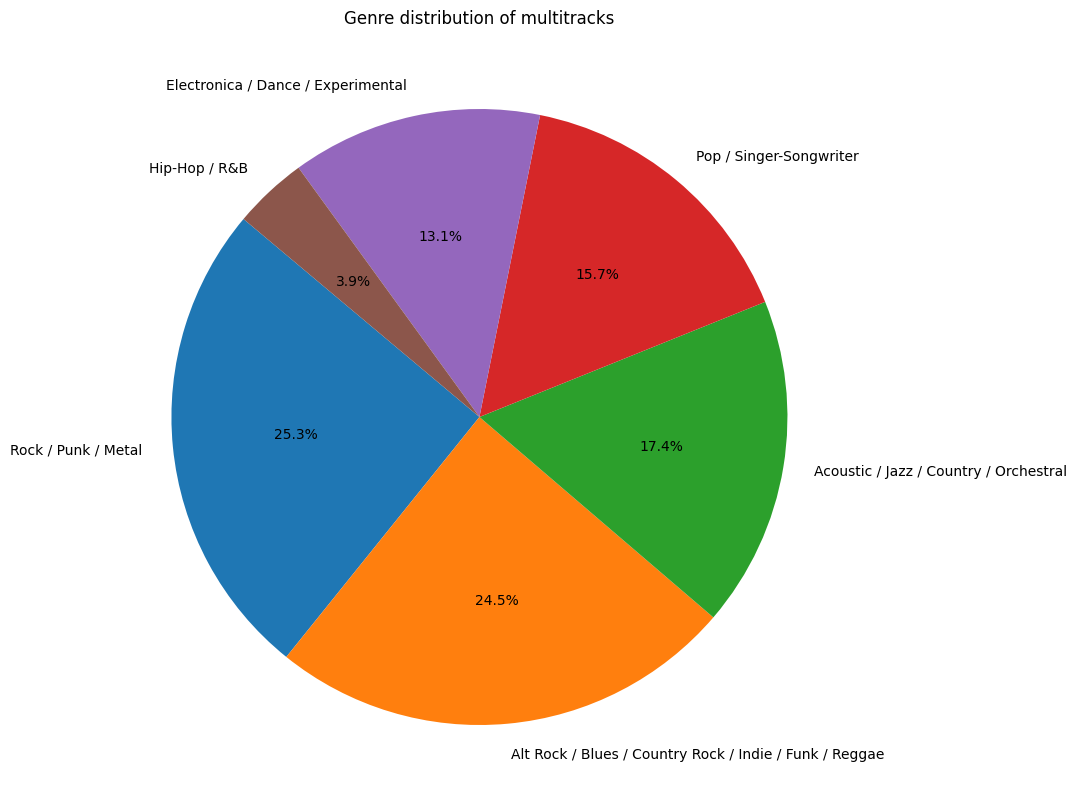

In [27]:
# count number of tracks in each genre and plot an pie chart
genre_counts = multitrack_metadata['Genre'].value_counts()
plt.figure(figsize=(10, 10))
genre_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Genre distribution of multitracks')
plt.ylabel('')

# improve the quality of the plot

plt.savefig('/home/soumya/cambridge-mt_scrapper/figures/genre_counts.png', dpi=300)

plt.show()

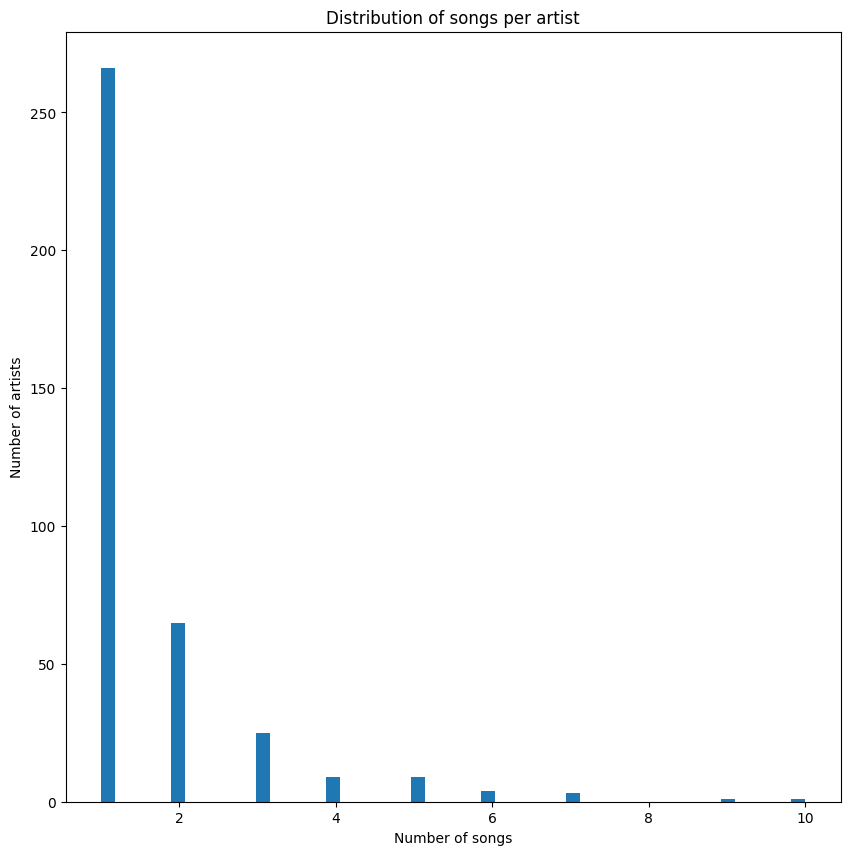

In [ ]:
# count the number of unique artists and plot a  distribution songs per artist
artist_counts = multitrack_metadata['Artist'].value_counts()

plt.figure(figsize=(10, 10))
artist_counts.plot.hist(bins=50)
plt.title('Distribution of songs per artist')
plt.xlabel('Number of songs')
plt.ylabel('Number of artists')
plt.savefig('/home/soumya/cambridge-mt_scrapper/figures/songs_per_artist.png', dpi=300)
plt.show()


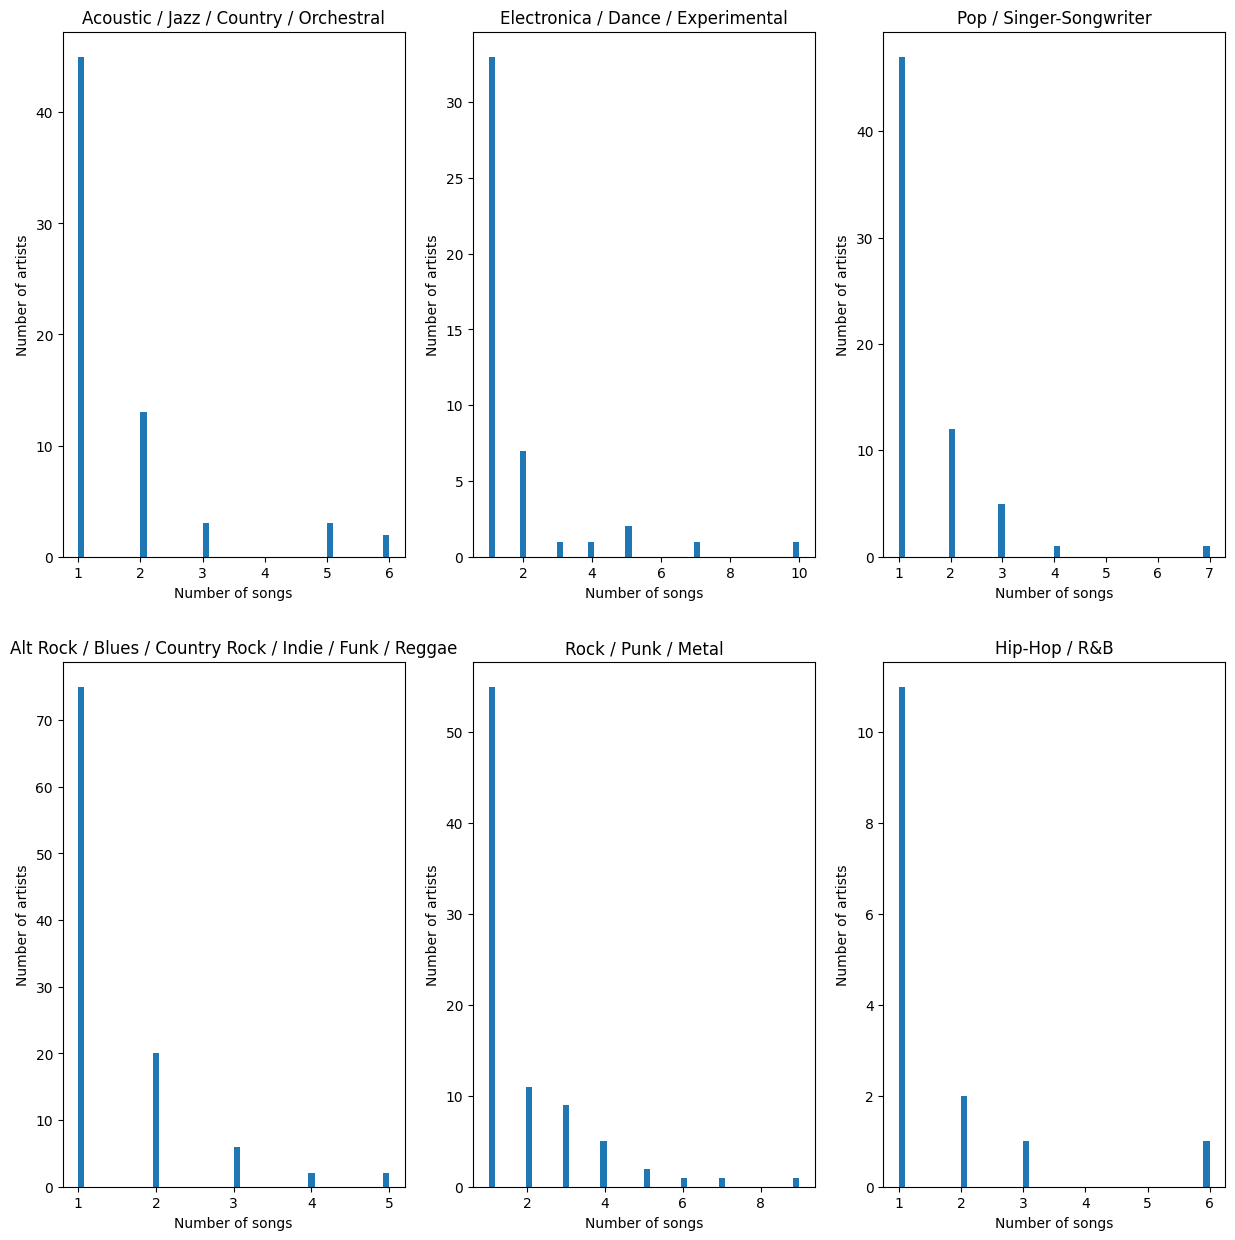

In [32]:
# plot subplots with number of songs per artist by genre
genres = multitrack_metadata['Genre'].unique()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
for i, genre in enumerate(genres):
    genre_artists = multitrack_metadata[multitrack_metadata['Genre'] == genre]['Artist'].value_counts()
    ax = axes[i // 3, i % 3]
    genre_artists.plot.hist(bins=50, ax=ax)
    ax.set_title(genre)
    ax.set_xlabel('Number of songs')
    ax.set_ylabel('Number of artists')
plt.savefig('/home/soumya/cambridge-mt_scrapper/figures/songs_per_artist_by_genre.png', dpi=300)
plt.show()

In [37]:
# find the nuber of songs witth Full Multitrack, songs with Excerpt Multitrack, songs with both
# sum of all the values that are not empty
print(len(multitrack_metadata))
full_multitrack = multitrack_metadata['Full Multitrack Link'].notnull().sum()
print(f'Full Multitrack: {full_multitrack}')
excerpt_multitrack = multitrack_metadata['Excerpt Multitrack Link'].notnull().sum()
print(f'Excerpt Multitrack: {excerpt_multitrack}')
both_multitrack = (multitrack_metadata['Full Multitrack Link'].notnull() & multitrack_metadata['Excerpt Multitrack Link'].notnull()).sum()
print(f'Both: {both_multitrack}')
# print(f'Excerpt Multitrack: {excerpt_multitrack}')
# print(f'Both: {both_multitrack}')
# print(f'Neither: {neither_multitrack}')


616
Full Multitrack: 614
Excerpt Multitrack: 518
Both: 517


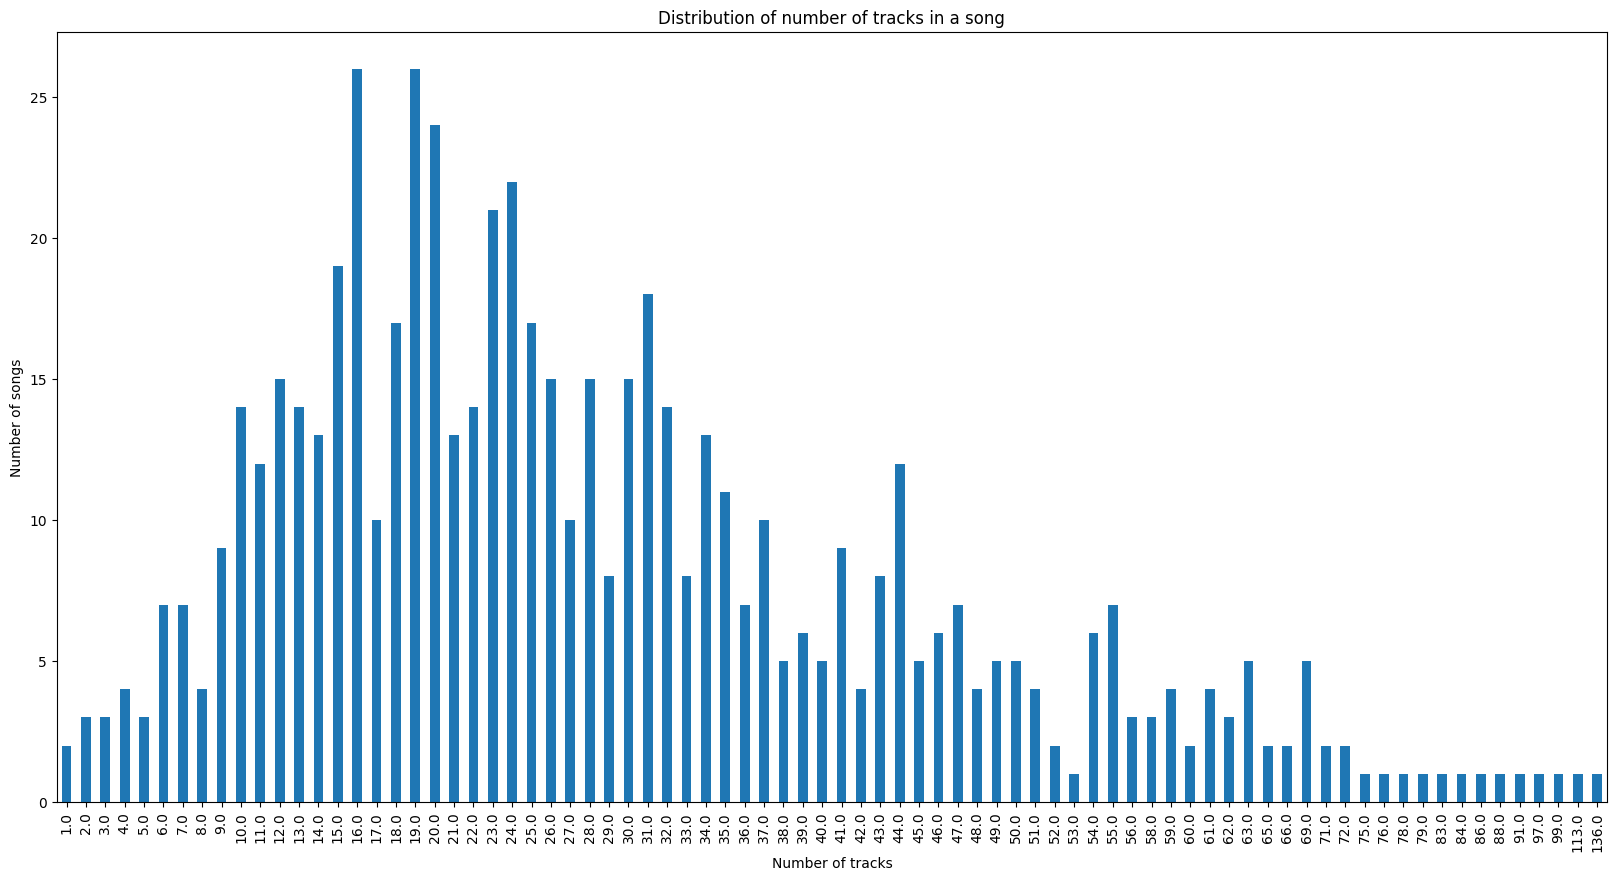

In [45]:
# distribution of number of track in a song
track_counts = multitrack_metadata['Number of Tracks (Full)'].value_counts()
# organise the data in ascending order
track_counts = track_counts.sort_index()
# plot histogram
plt.figure(figsize=(20, 10))
track_counts.plot.bar()
plt.title('Distribution of number of tracks in a song')
plt.xlabel('Number of tracks')
plt.ylabel('Number of songs')
plt.savefig('/home/soumya/cambridge-mt_scrapper/figures/track_counts.png', dpi=300)
plt.show()

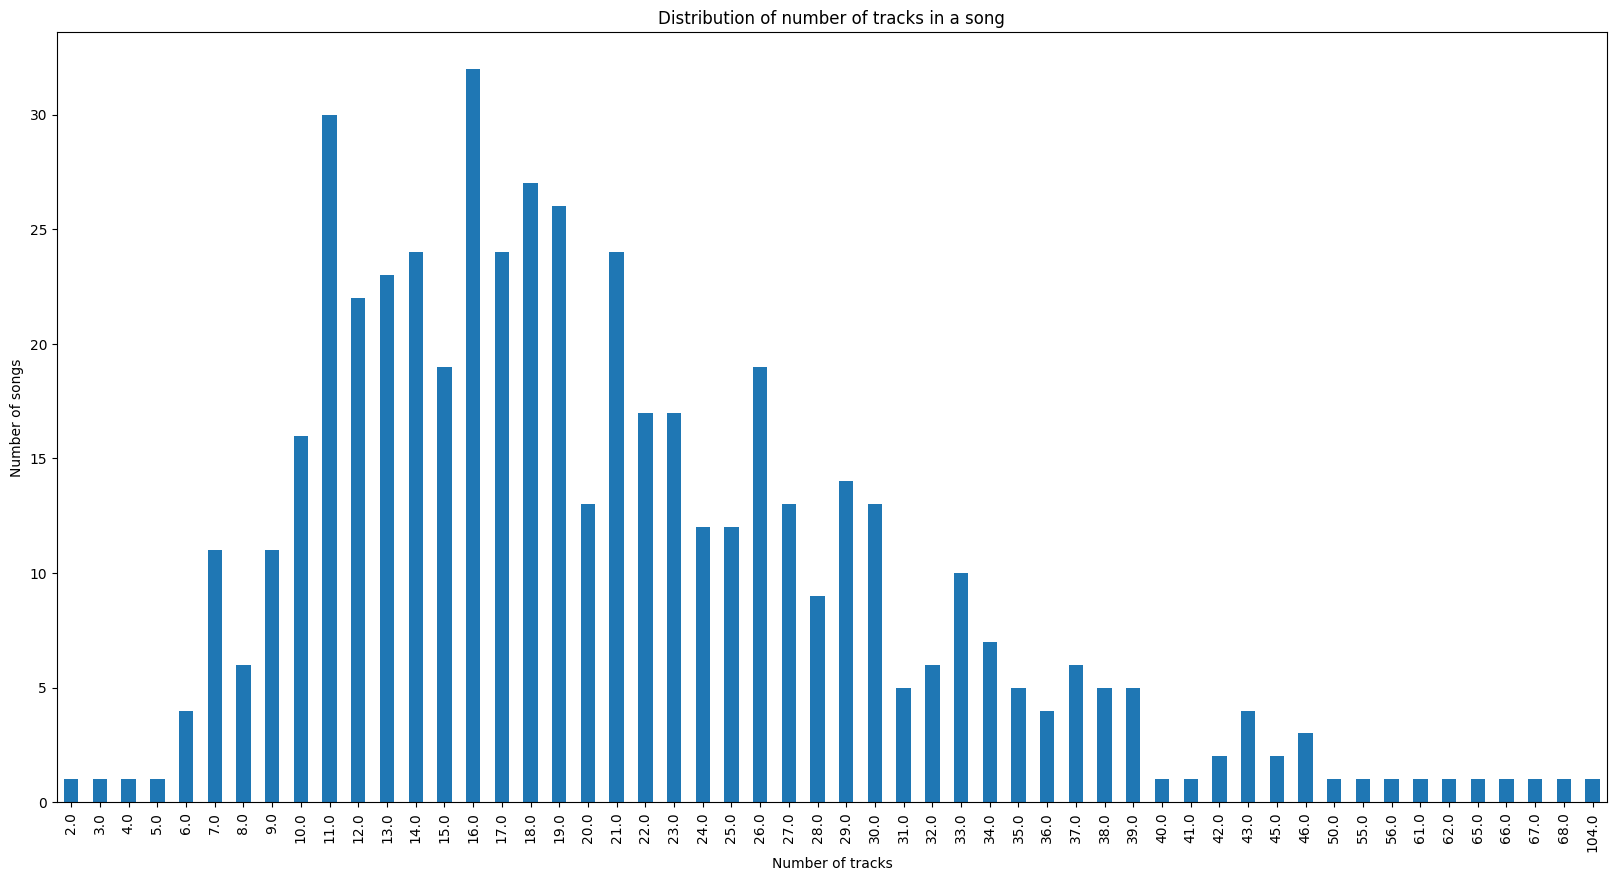

In [46]:
# distribution of number of track in a song
track_counts = multitrack_metadata['Number of Tracks (Excerpt)'].value_counts()
# organise the data in ascending order
track_counts = track_counts.sort_index()
# plot histogram
plt.figure(figsize=(20, 10))
track_counts.plot.bar()
plt.title('Distribution of number of tracks in a song')
plt.xlabel('Number of tracks')
plt.ylabel('Number of songs')
plt.savefig('/home/soumya/cambridge-mt_scrapper/figures/track_counts.png', dpi=300)
plt.show()

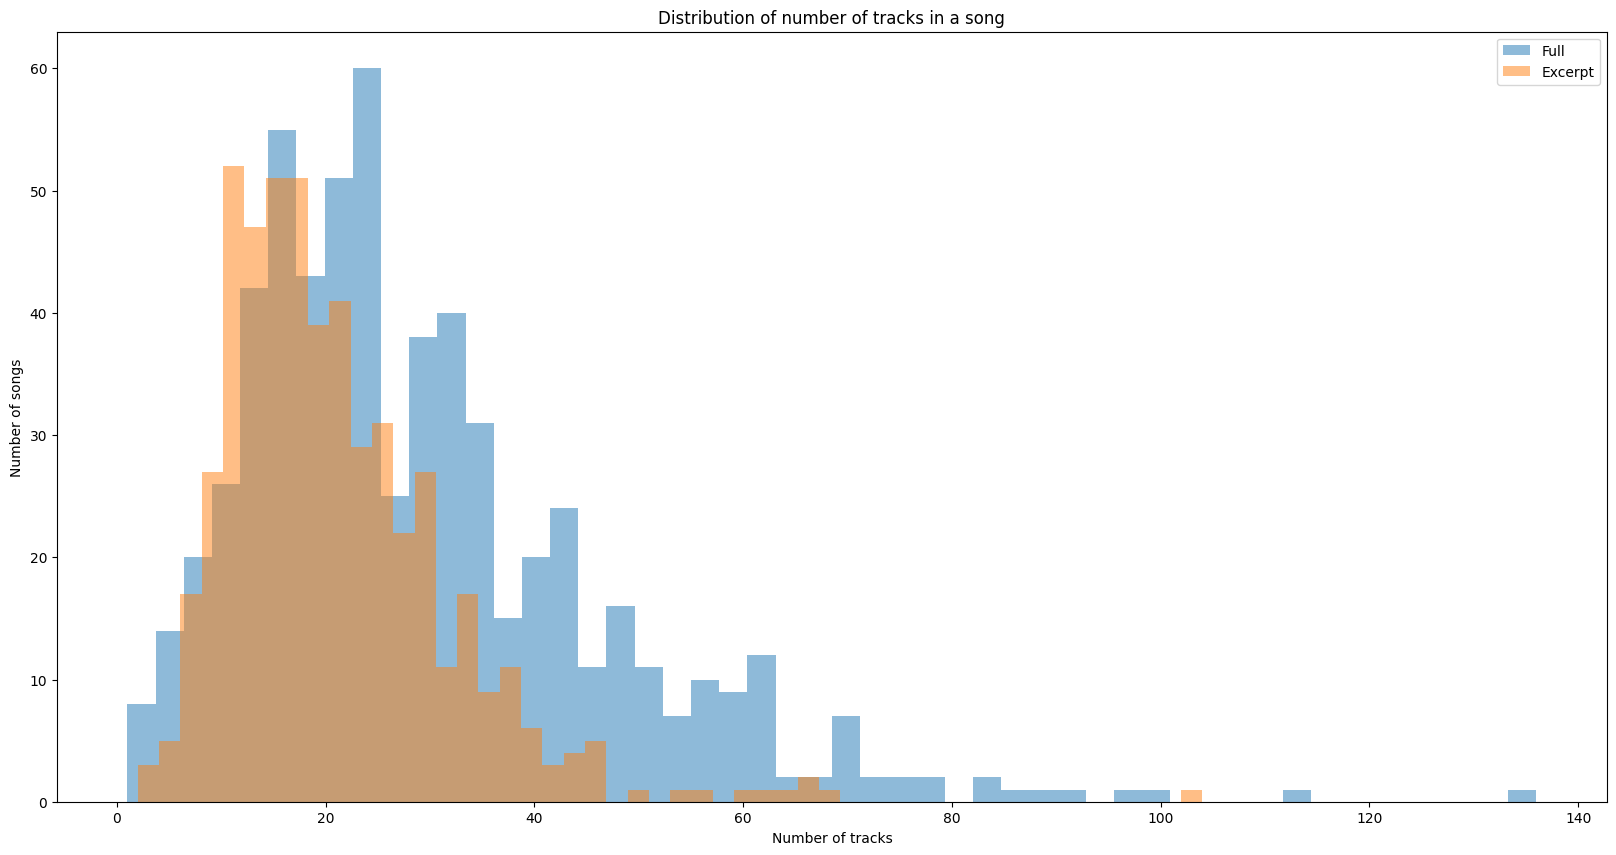

In [47]:
# plot both the distributions in the same plot
plt.figure(figsize=(20, 10))
multitrack_metadata['Number of Tracks (Full)'].plot.hist(bins=50, alpha=0.5, label='Full')
multitrack_metadata['Number of Tracks (Excerpt)'].plot.hist(bins=50, alpha=0.5, label='Excerpt')
plt.title('Distribution of number of tracks in a song')
plt.xlabel('Number of tracks')
plt.ylabel('Number of songs')
plt.legend()
plt.savefig('/home/soumya/cambridge-mt_scrapper/figures/track_counts_full_excerpt.png', dpi=300)
plt.show()

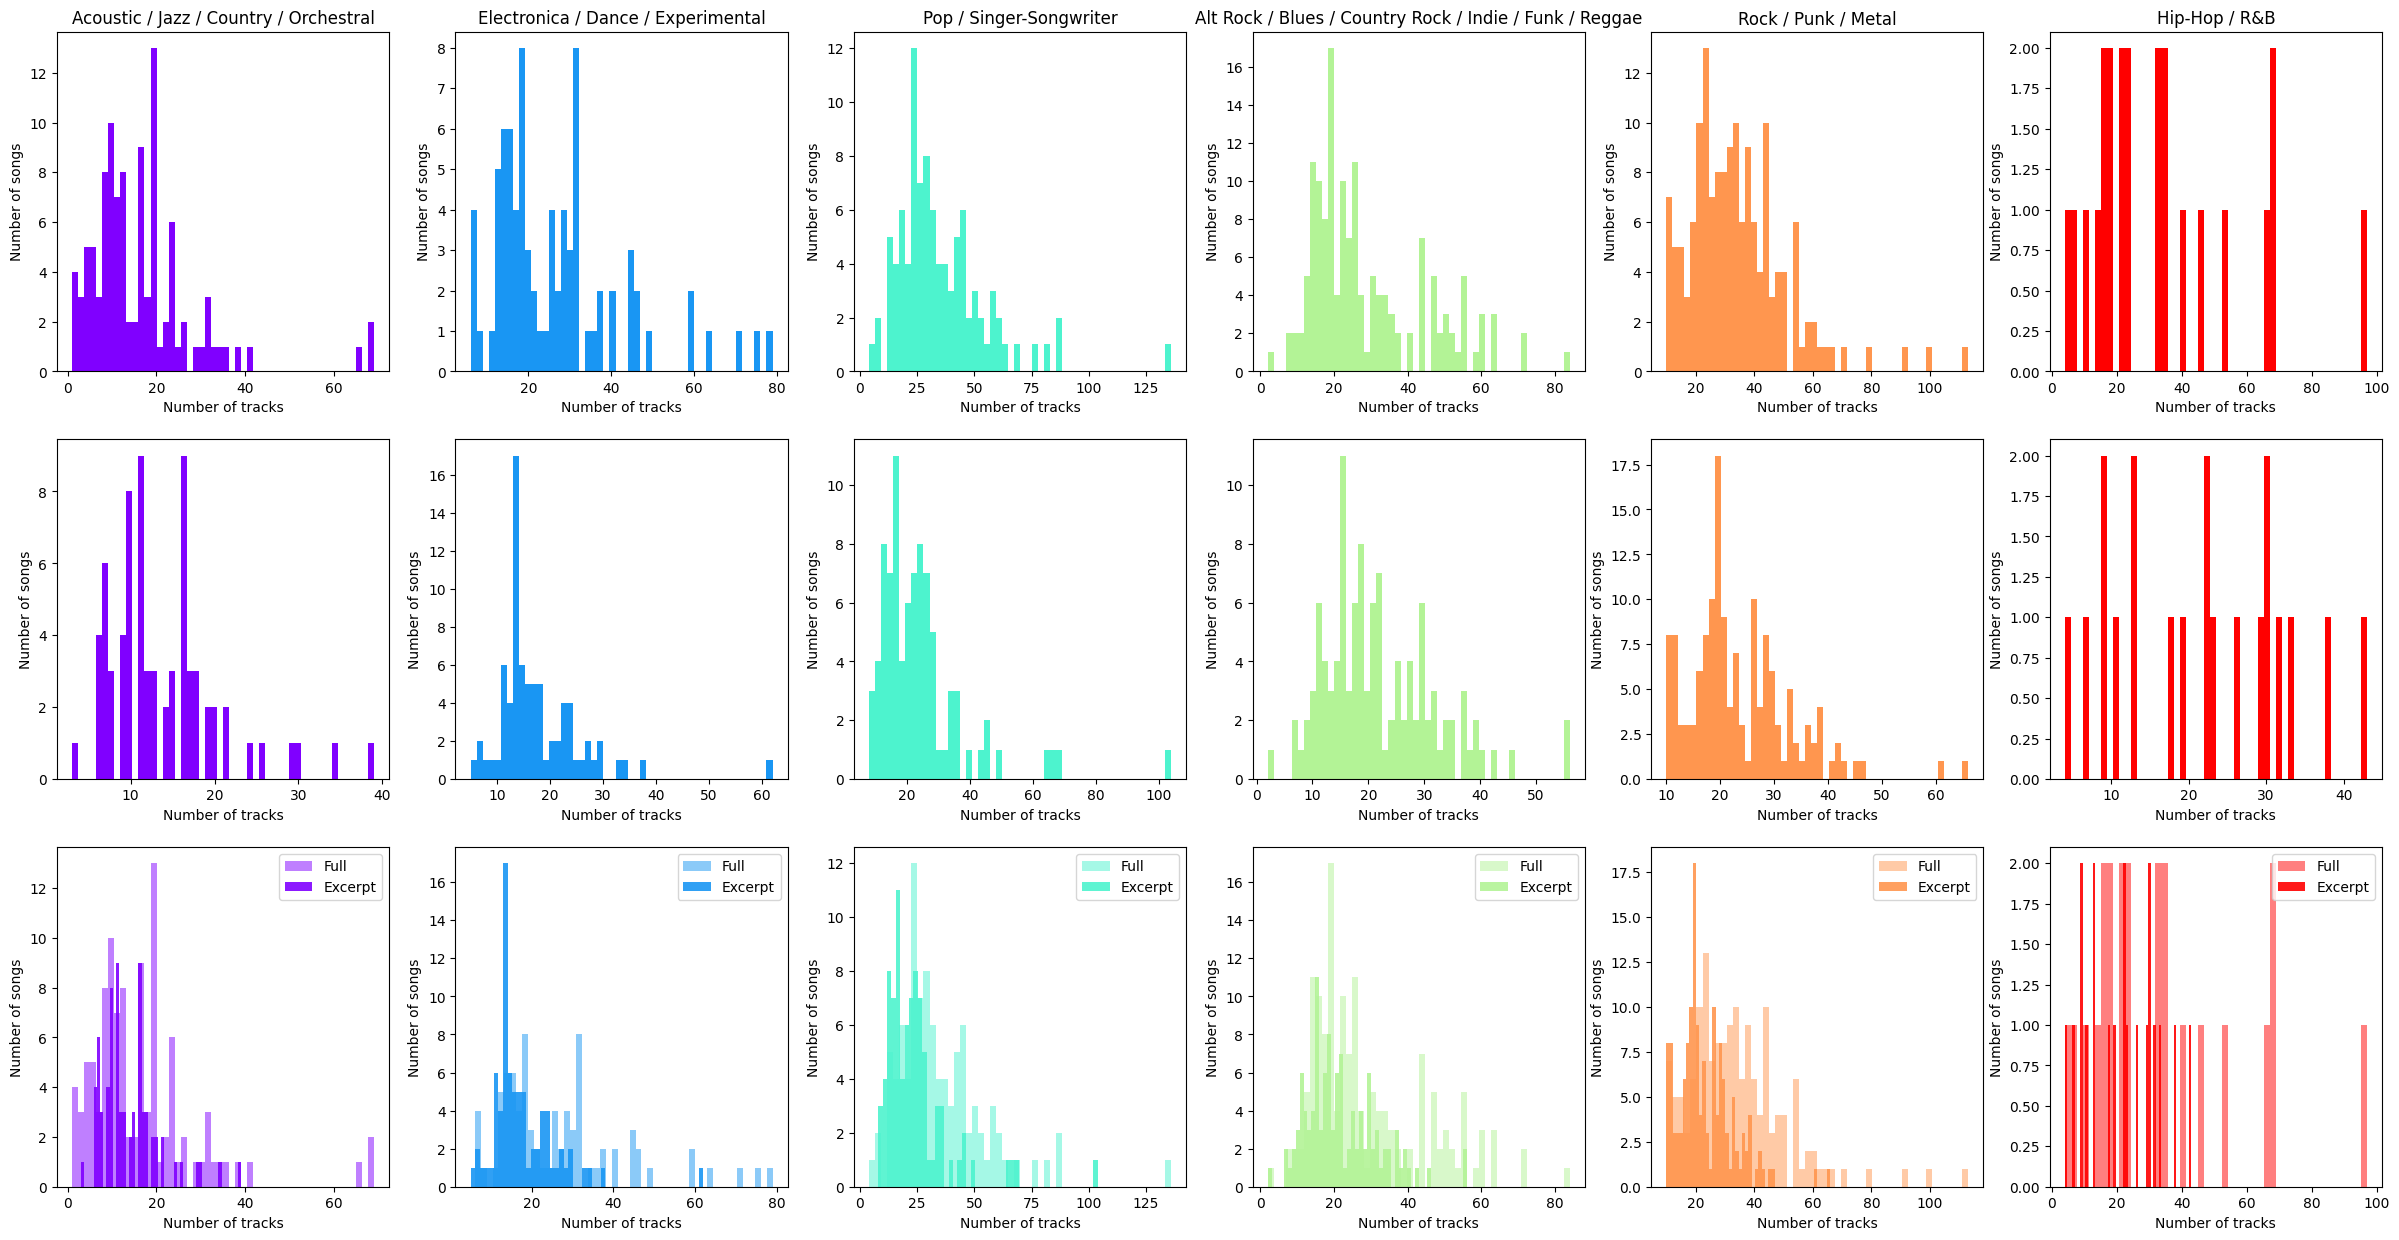

In [61]:
# plot all the three disctributions by genre, with genre in the row and the distribution in the column, first column is
# full, second column is excerpt and third column is both
# use different colour for each genre and add a legend. Dont write genre name in plot
# use different colour for each genre and add a legend
from matplotlib import cm
import numpy as np

genres = multitrack_metadata['Genre'].unique()
color = iter(cm.rainbow(np.linspace(0, 1, len(genres))))
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(30, 15))
for i, genre in enumerate(genres):
    
    # use a different colour for each genre
    c = next(color)
    full = multitrack_metadata[multitrack_metadata['Genre'] == genre]['Number of Tracks (Full)']
    excerpt = multitrack_metadata[multitrack_metadata['Genre'] == genre]['Number of Tracks (Excerpt)']
    ax = axes[0, i]
    ax.set_title(genre)
    full.plot.hist(bins=50, ax=ax, label='Full', color=c)
    ax.set_xlabel('Number of tracks')
    ax.set_ylabel('Number of songs')
    ax = axes[1, i]
    excerpt.plot.hist(bins=50, ax=ax, label='Excerpt', color=c)
    ax.set_xlabel('Number of tracks')
    ax.set_ylabel('Number of songs')
    ax = axes[2, i]
    full.plot.hist(bins=50, ax=ax, alpha=0.5, label='Full', color=c)
    excerpt.plot.hist(bins=50, ax=ax, alpha=0.9, label='Excerpt', color=c)
    ax.legend()
    ax.set_xlabel('Number of tracks')
    ax.set_ylabel('Number of songs')

plt.savefig('/home/soumya/cambridge-mt_scrapper/figures/track_counts_by_genre.png', dpi=300)